#### Forest Cover Type Prediction : 콜로라도 주에 있는 산림의 지형적 특징, 흙의 종류, 지표수까지의 위치 등의 정보를 통해 <br> 산림의 종류를 예측하는 대회

 #### Column Info
    Elevation - 높이 (m)
    Aspect - 방향 (표면이 향하는 방향)
    Slope - 경사도
    Horizontal_Distance_To_Hydrology - 지표수까지의 가장 가까운 수평거리
    Vertical_Distance_To_Hydrology - 지표수까지의 가장 가까운 수직거리
    Horizontal_Distance_To_Roadways - 차도까지의 가장 가까운 수평거리
    Horizontal_Distance_To_Fire_Points - 불이 났던 지점으로부터 가장 가까운 수평거리
    Hillshade_9am - 하지점(Summer solstice) 기준으로 9am의 태양의 위치에 따른 음영
    Hillshade_Noon - 하지점(Summer solstice) 기준으로 12am의 태양의 위치에 따른 음영
    Hillshade_3pm - 하지점(Summer solstice) 기준으로 3pm의 태양의 위치에 따른 음영
    Wilderness_Area - 야생 지역 위치 (0~3)
    Soil_Type - 토양 타입 (0~39)
    Cover_Type - 산림 타입 (Target) -> 1)Spurce/Fir 2)Lodgepole Pine 3)Ponderosa Pine 4)Krummholz

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##### Let's just follow the baseline

In [73]:
from os.path import join

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
BASE_DIR = '/content/drive/MyDrive/python_with_two/SH/Kaggle'

train_path = join(BASE_DIR, 'kagglecamp2022', 'train.csv')
test_path = join(BASE_DIR, 'kagglecamp2022','test.csv')

data = pd.read_csv(train_path)
x_test = pd.read_csv(test_path)
label = data['Cover_Type']

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/python_with_two/SH/Kaggle\\kagglecamp2022\\train.csv'

In [74]:
BASE_DIR = 'C:/tensorTest'

train_path = join(BASE_DIR, 'kagglecamp2022', 'train.csv')
test_path = join(BASE_DIR, 'kagglecamp2022','test.csv')

data = pd.read_csv(train_path)
x_test = pd.read_csv(test_path)
label = data['Cover_Type']

#### Exploring data

In [ ]:
data.head()

,id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Soil_Type,Wilderness_Area,Cover_Type
0,0,2983,339,23,97.0,NaN,1441.0,223.0,205.0,105.0,3487.0,21,0,1
1,1,3046,375,5,69.0,-3.0,865.0,223.0,225.0,149.0,1522.0,0,2,2
2,2,2540,199,10,128.0,2.0,1009.0,216.0,245.0,146.0,1977.0,0,0,2
3,3,2893,351,21,54.0,19.0,4886.0,247.0,195.0,127.0,1777.0,18,2,2
4,4,2529,58,35,92.0,42.0,455.0,225.0,249.0,168.0,264.0,25,2,2


In [ ]:
data.shape

(826224, 14)

In [ ]:
data.describe()

,id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Soil_Type,Wilderness_Area,Cover_Type
count,826224.000000,826224.000000,826224.000000,826224.000000,817992.000000,793164.000000,793085.000000,784779.000000,793109.000000,784866.000000,793303.000000,826224.000000,826224.000000,826224.000000
mean,413111.500000,2943.346507,151.517130,15.260949,272.227882,52.673064,1706.496011,211.868308,220.940612,140.612038,1516.416838,10.367157,1.456131,1.912988
std,238510.468744,328.216211,109.858219,8.588512,226.315705,68.186882,1286.145727,30.701996,22.277715,43.710597,1110.210430,12.770907,0.961180,0.796831
min,0.000000,1784.000000,-31.000000,-3.000000,-75.000000,-296.000000,-287.000000,4.000000,56.000000,-51.000000,-267.000000,0.000000,0.000000,1.000000
25%,206555.750000,2702.000000,60.000000,9.000000,111.000000,4.000000,792.000000,198.000000,210.000000,115.000000,735.000000,0.000000,0.000000,1.000000
50%,413111.500000,2932.000000,123.000000,14.000000,214.000000,33.000000,1381.000000,218.000000,224.000000,142.000000,1278.000000,3.000000,2.000000,2.000000
75%,619667.250000,3216.000000,247.000000,20.000000,363.000000,80.000000,2268.000000,233.000000,237.000000,169.000000,1999.000000,21.000000,2.000000,2.000000
max,826223.000000,4322.000000,405.000000,63.000000,1575.000000,628.000000,7666.000000,291.000000,279.000000,271.000000,8006.000000,39.000000,3.000000,4.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 826224 entries, 0 to 826223
Data columns (total 14 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   id                                  826224 non-null  int64  
 1   Elevation                           826224 non-null  int64  
 2   Aspect                              826224 non-null  int64  
 3   Slope                               826224 non-null  int64  
 4   Horizontal_Distance_To_Hydrology    817992 non-null  float64
 5   Vertical_Distance_To_Hydrology      793164 non-null  float64
 6   Horizontal_Distance_To_Roadways     793085 non-null  float64
 7   Hillshade_9am                       784779 non-null  float64
 8   Hillshade_Noon                      793109 non-null  float64
 9   Hillshade_3pm                       784866 non-null  float64
 10  Horizontal_Distance_To_Fire_Points  793303 non-null  float64
 11  Soil_Type                 

In [ ]:
x_test.head()

,id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Soil_Type,Wilderness_Area
0,0,3101,47,31,87.0,11.0,1579.0,213.0,226.0,90.0,1352.0,0,2
1,1,2584,176,18,625.0,37.0,159.0,197.0,230.0,118.0,1227.0,0,2
2,2,3501,41,-1,134.0,-9.0,4309.0,215.0,214.0,186.0,4130.0,11,2
3,3,3322,87,11,106.0,53.0,2377.0,229.0,233.0,189.0,159.0,10,0
4,4,2918,9,6,311.0,70.0,193.0,210.0,238.0,147.0,735.0,0,2


In [ ]:
x_test.describe()

,id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Soil_Type,Wilderness_Area
count,550816.000000,550816.000000,550816.000000,550816.000000,545278.000000,528795.000000,528874.000000,523409.000000,528850.000000,523322.000000,528656.000000,550816.000000,550816.000000
mean,275407.500000,2944.109567,151.443852,15.234367,271.967545,52.843837,1707.654027,211.895139,221.013397,140.671464,1518.082280,10.376699,1.454143
std,159007.027274,328.006946,109.707668,8.586205,226.309936,68.395071,1287.935400,30.698694,22.276175,43.655699,1114.598851,12.776968,0.961824
min,0.000000,1773.000000,-32.000000,-3.000000,-92.000000,-282.000000,-255.000000,-2.000000,50.000000,-49.000000,-270.000000,0.000000,0.000000
25%,137703.750000,2703.000000,61.000000,9.000000,111.000000,4.000000,793.000000,198.000000,210.000000,115.000000,735.000000,0.000000,0.000000
50%,275407.500000,2933.000000,123.000000,14.000000,214.000000,33.000000,1381.000000,218.000000,224.000000,142.000000,1277.000000,3.000000,2.000000
75%,413111.250000,3216.000000,246.000000,20.000000,362.000000,80.000000,2269.000000,233.000000,237.000000,169.000000,1999.000000,21.000000,2.000000
max,550815.000000,4355.000000,402.000000,61.000000,1592.000000,628.000000,7586.000000,297.000000,269.000000,272.000000,7989.000000,39.000000,3.000000


In [ ]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550816 entries, 0 to 550815
Data columns (total 13 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   id                                  550816 non-null  int64  
 1   Elevation                           550816 non-null  int64  
 2   Aspect                              550816 non-null  int64  
 3   Slope                               550816 non-null  int64  
 4   Horizontal_Distance_To_Hydrology    545278 non-null  float64
 5   Vertical_Distance_To_Hydrology      528795 non-null  float64
 6   Horizontal_Distance_To_Roadways     528874 non-null  float64
 7   Hillshade_9am                       523409 non-null  float64
 8   Hillshade_Noon                      528850 non-null  float64
 9   Hillshade_3pm                       523322 non-null  float64
 10  Horizontal_Distance_To_Fire_Points  528656 non-null  float64
 11  Soil_Type                 

In [75]:
# Dropping unneeded columns
data.drop(columns = ['id', 'Cover_Type'], inplace=True)
x_test.drop(columns = ['id',             ], inplace=True)

In [76]:
cat_columns = ['Soil_Type', 'Wilderness_Area']
num_columns = [c for c in data.columns if (c not in cat_columns)]

print('Categorical Columns : \n{}\n'.format(cat_columns))
print('Numeric Columns : \n{}\n'.format(num_columns))

Categorical Columns : 
['Soil_Type', 'Wilderness_Area']

Numeric Columns : 
['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']



In [ ]:
label # 1 - 4

0         1
1         2
2         2
3         2
4         2
         ..
826219    2
826220    1
826221    1
826222    1
826223    1
Name: Cover_Type, Length: 826224, dtype: int64

#### Check the missing values : msno

In [ ]:
import missingno as msno

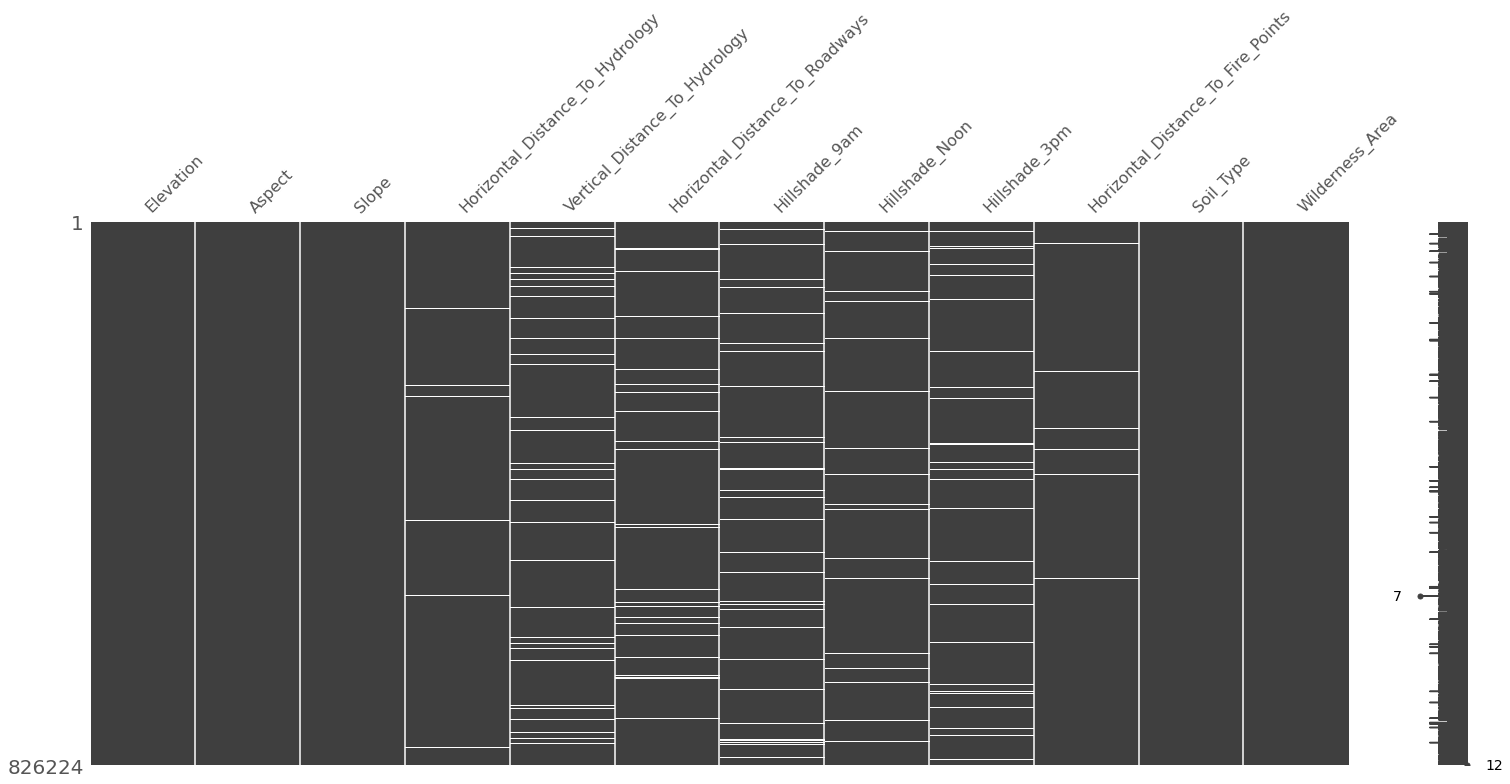

In [ ]:
msno.matrix(data)

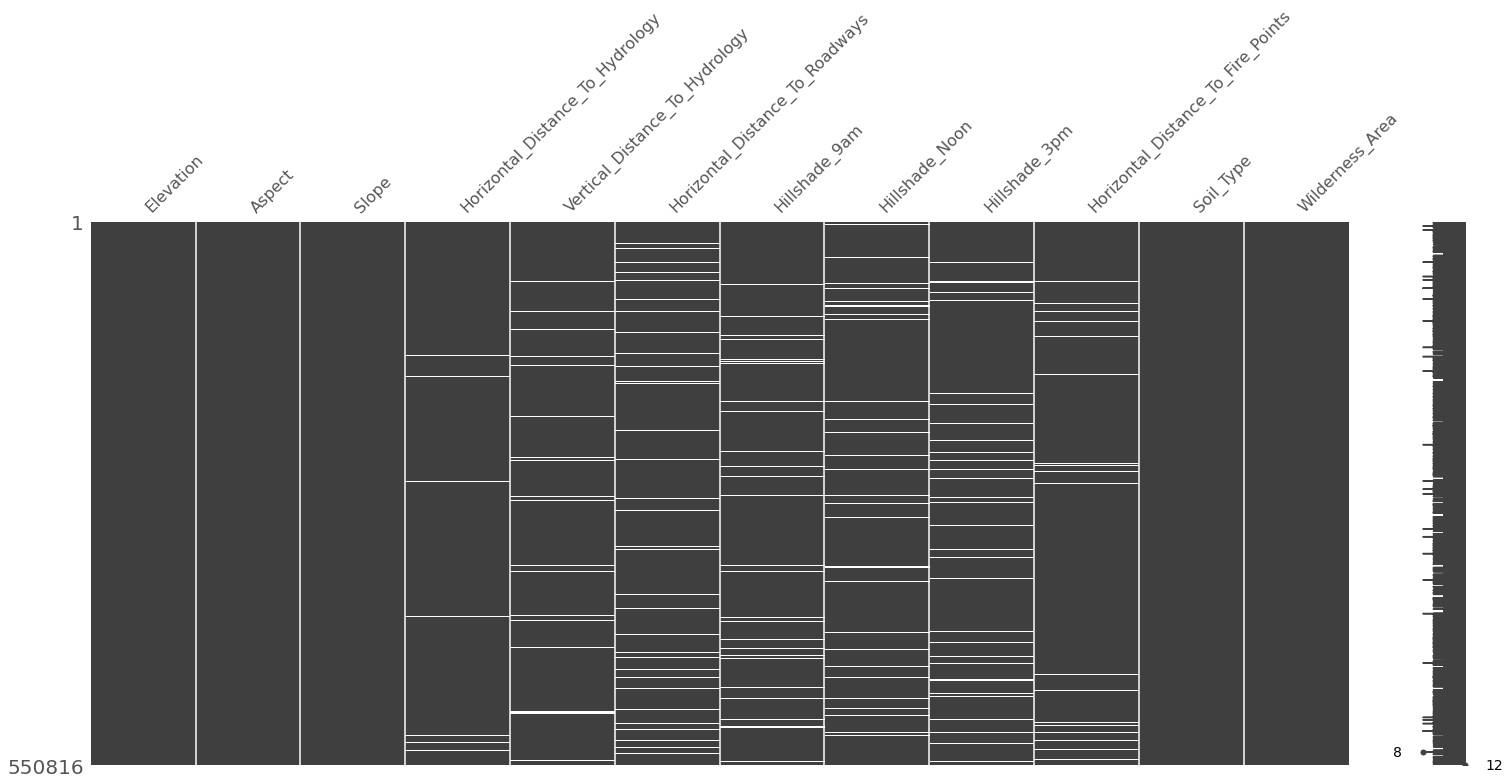

In [ ]:
msno.matrix(x_test)

In [ ]:
pd.isna(data[num_columns]).sum() # Hillshade_9am, Hillshade_3pm have the most missing values

Elevation                                 0
Aspect                                    0
Slope                                     0
Horizontal_Distance_To_Hydrology       8232
Vertical_Distance_To_Hydrology        33060
Horizontal_Distance_To_Roadways       33139
Hillshade_9am                         41445
Hillshade_Noon                        33115
Hillshade_3pm                         41358
Horizontal_Distance_To_Fire_Points    32921
dtype: int64

In [ ]:
pd.isna(x_test[num_columns]).sum()

Elevation                                 0
Aspect                                    0
Slope                                     0
Horizontal_Distance_To_Hydrology       5538
Vertical_Distance_To_Hydrology        22021
Horizontal_Distance_To_Roadways       21942
Hillshade_9am                         27407
Hillshade_Noon                        21966
Hillshade_3pm                         27494
Horizontal_Distance_To_Fire_Points    22160
dtype: int64

#### Check the correlation between the columns : Heatmap

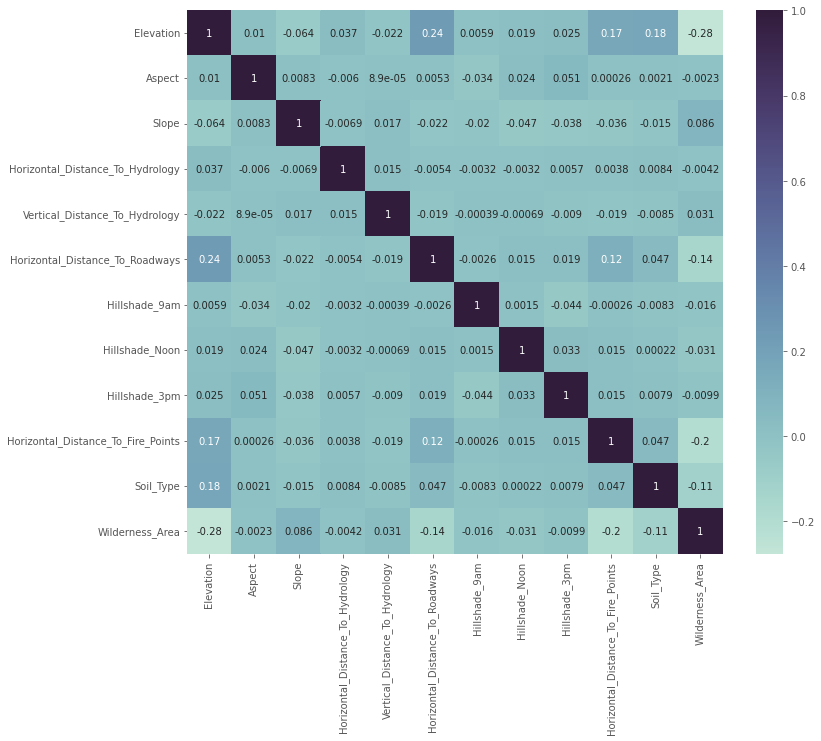

In [ ]:
f, ax = plt.subplots(figsize = (12, 10))
cmap = sns.cubehelix_palette(start = .5, rot = -.5, as_cmap=True)
sns.heatmap(data.corr(), annot = True, cmap = cmap)
plt.show()
# There's no significant correlation between the columns

#### train-test split

In [77]:
from sklearn.model_selection import train_test_split
# The ratio of the split train and valid data is 8:2, the internal random number value is 1994, 
# mixes when splitting the data and stratifies it with the label value.
x_train, x_valid, y_train, y_valid = train_test_split(data, label, test_size = .3,
                                                     random_state = 1114,
                                                      shuffle=True,
                                                     stratify = label)

In [78]:
# You'd better organize the index of the split data. This is because during the pd.concat() operation, it is connected based on the index.
# If the 'drop' factor is not given as True, the previous index is created as a new variable.
x_train = x_train.reset_index(drop=True)
x_valid = x_valid.reset_index(drop=True)

In [ ]:
x_train.shape, x_valid.shape

((660979, 12), (165245, 12))

In [22]:
meaningless_cols = [col for col in num_columns if col not in ['Elevation', 'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points']]
print('|상관 계수| < 0.1 컬럼:\n{}'.format(meaningless_cols))

|상관 계수| < 0.1 컬럼:
['Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm']


In [20]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder

In [23]:
def preprocess(x_train, x_valid, x_test):
    temp_x_train = x_train.copy()
    temp_x_valid = x_valid.copy()
    temp_x_test = x_test.copy()

    temp_x_train.reset_index(drop=True, inplace=True)
    temp_x_valid.reset_index(drop=True, inplace=True)

    # 수치형 결측치 처리
    imputer = IterativeImputer(max_iter=20, random_state=42)

    temp_x_train[num_columns] = imputer.fit_transform(temp_x_train[num_columns])
    temp_x_valid[num_columns] = imputer.transform(temp_x_valid[num_columns])
    temp_x_test[num_columns] = imputer.transform(temp_x_test[num_columns])

    # 상관 계수 0.1이하 스케일링
    scaler = RobustScaler()

    temp_x_train[meaningless_cols] = scaler.fit_transform(temp_x_train[meaningless_cols])
    temp_x_valid[meaningless_cols] = scaler.transform(temp_x_valid[meaningless_cols])
    temp_x_test[meaningless_cols] = scaler.transform(temp_x_test[meaningless_cols])

    # 원 핫 인코딩
    cat_all = pd.concat([temp_x_train[cat_columns],temp_x_valid[cat_columns], temp_x_test[cat_columns]], axis=0)
    ohe = OneHotEncoder(sparse=False)
    ohe.fit(cat_all)

    ohe_columns = list()
    for cols, col in zip(ohe.categories_, cat_columns):
        ohe_columns += [f'{col}_{c}' for c in cols.tolist()]

    cat_train = pd.DataFrame(ohe.transform(temp_x_train[cat_columns]), columns=ohe_columns)
    cat_valid = pd.DataFrame(ohe.transform(temp_x_valid[cat_columns]), columns=ohe_columns)
    cat_test = pd.DataFrame(ohe.transform(temp_x_test[cat_columns]), columns=ohe_columns)

    temp_x_train.drop(columns=cat_columns, inplace=True)
    temp_x_valid.drop(columns=cat_columns, inplace=True)
    temp_x_test.drop(columns=cat_columns, inplace=True)

    temp_x_train = pd.concat([temp_x_train, cat_train], axis=1)
    temp_x_valid = pd.concat([temp_x_valid, cat_valid], axis=1)
    temp_x_test = pd.concat([temp_x_test, cat_test], axis=1)

    return temp_x_train, temp_x_valid, temp_x_test

In [24]:
x_train, x_valid, x_test = preprocess(x_train, x_valid, x_test)

#### Preprocessing missing values : Simpleimputer

In [79]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'most_frequent')
x_train[num_columns] = imputer.fit_transform(x_train[num_columns])
x_valid[num_columns] = imputer.transform(x_valid[num_columns])
x_test[num_columns] = imputer.transform(x_test[num_columns])

#### Scaling : MinMaxScaler

In [ ]:
# Numeric Columns : 
# ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 
#  'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']

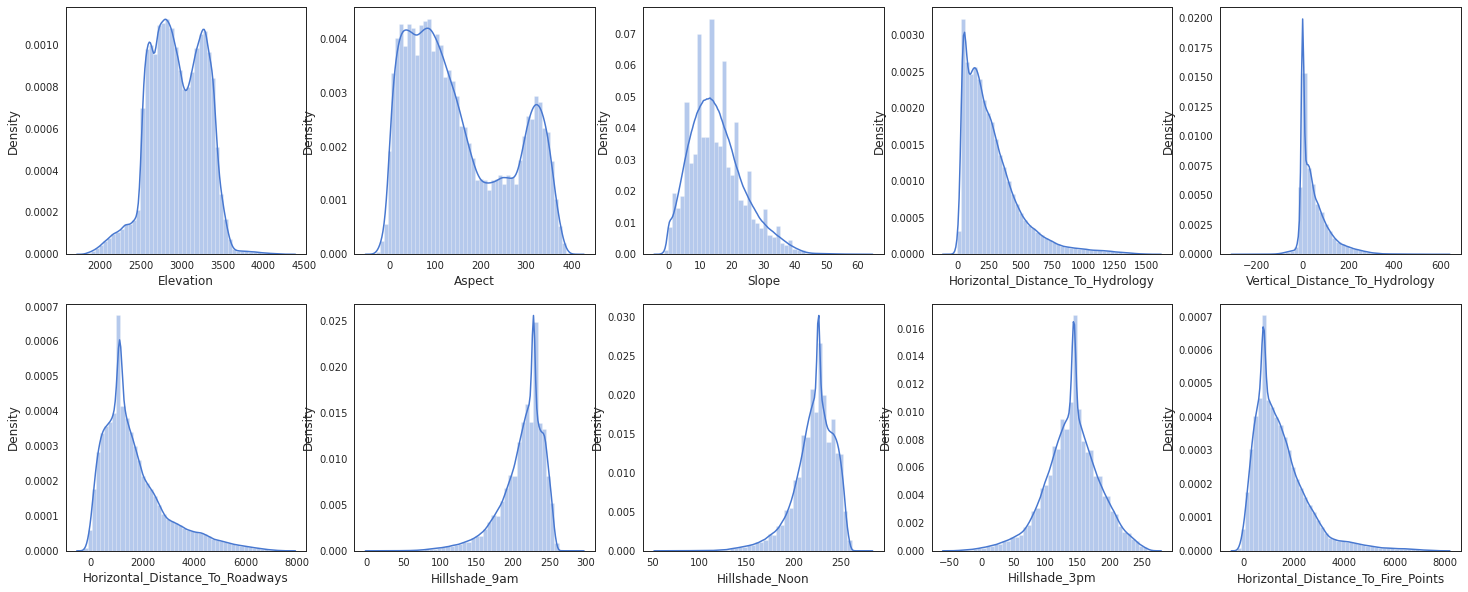

In [ ]:
# Check the distribution of the numeric columns by distplot
import warnings
warnings.filterwarnings(action='ignore') 

sns.set_palette("muted")
sns.set_style("white")
fig, ax2 = plt.subplots(2, 5, figsize = (25, 10))
sns.distplot(x_train['Elevation'],ax = ax2[0][0])
sns.distplot(x_train['Aspect'],ax = ax2[0][1])
sns.distplot(x_train['Slope'],ax = ax2[0][2])
sns.distplot(x_train['Horizontal_Distance_To_Hydrology'],ax = ax2[0][3])
sns.distplot(x_train['Vertical_Distance_To_Hydrology'],ax = ax2[0][4])
sns.distplot(x_train['Horizontal_Distance_To_Roadways'],ax = ax2[1][0])
sns.distplot(x_train['Hillshade_9am'],ax = ax2[1][1])
sns.distplot(x_train['Hillshade_Noon'],ax = ax2[1][2])
sns.distplot(x_train['Hillshade_3pm'],ax = ax2[1][3])
sns.distplot(x_train['Horizontal_Distance_To_Fire_Points'],ax = ax2[1][4])

Given the shape of the distribution, MinMaxScaler would be better than StandardScaler

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# x_train[num_columns] = scaler.fit_transform(x_train[num_columns])
# x_valid[num_columns] = scaler.transform(x_valid[num_columns])
# x_test[num_columns] = scaler.transform(x_test[num_columns])

#### or RobustScaler?

In [80]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
x_train[num_columns] = scaler.fit_transform(x_train[num_columns])
x_valid[num_columns] = scaler.transform(x_valid[num_columns])
x_test[num_columns] = scaler.transform(x_test[num_columns])

In [ ]:
x_train[num_columns].describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
count,660979.000000,660979.000000,660979.000000,660979.000000,660979.000000,660979.000000,660979.000000,660979.000000,660979.000000,660979.000000
mean,0.021759,0.154182,0.114878,0.232679,0.278386,0.253262,-0.215858,-0.154025,-0.062776,0.215625
std,0.639725,0.590764,0.781197,0.897876,0.914011,0.907059,0.886671,0.873783,0.836414,0.914672
min,-2.231969,-0.827957,-1.545455,-1.134921,-4.405405,-1.158309,-6.352941,-6.760000,-3.823529,-1.247706
25%,-0.448343,-0.333333,-0.454545,-0.408730,-0.364865,-0.366046,-0.617647,-0.560000,-0.549020,-0.392827
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.551657,0.666667,0.545455,0.591270,0.635135,0.633954,0.382353,0.440000,0.450980,0.607173
max,2.709552,1.516129,4.454545,5.412698,8.081081,4.538682,2.088235,2.160000,2.490196,5.631359


In [ ]:
x_valid[num_columns].describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
count,165245.000000,165245.000000,165245.000000,165245.000000,165245.000000,165245.000000,165245.000000,165245.000000,165245.000000,165245.000000
mean,0.023555,0.149863,0.113648,0.236238,0.276011,0.250460,-0.213407,-0.155222,-0.064422,0.215532
std,0.640089,0.590111,0.779079,0.901876,0.911631,0.904075,0.883979,0.874722,0.831684,0.916299
min,-2.237817,-0.811828,-1.454545,-1.019841,-4.283784,-1.125358,-6.117647,-6.720000,-3.686275,-1.239366
25%,-0.446394,-0.338710,-0.454545,-0.408730,-0.364865,-0.368195,-0.617647,-0.560000,-0.549020,-0.396163
50%,0.000000,-0.005376,0.000000,0.003968,0.000000,-0.002149,0.000000,0.000000,0.000000,0.000000
75%,0.553606,0.661290,0.545455,0.599206,0.635135,0.630372,0.382353,0.440000,0.450980,0.609675
max,2.656920,1.505376,4.454545,5.301587,7.837838,4.396848,1.970588,1.600000,2.431373,5.652210


#### Modeling : Let's try everything possible

#### Logistic Regression

In [81]:
from sklearn.metrics import accuracy_score, log_loss, f1_score, confusion_matrix

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
lr.fit(x_train, y_train)

C:\Users\TFG5076XG\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = lr.predict(x_valid)
y_pred_proba = lr.predict_proba(x_valid)

In [ ]:
print('로지스틱 회귀, 정확도 : {:.4f}'.format(accuracy_score(y_valid, y_pred)))
print('로지스틱 회귀, Log loss : {:.4f}'.format(log_loss(y_valid, y_pred_proba)))

로지스틱 회귀, 정확도 : 0.8896
로지스틱 회귀, Log loss : 0.2967


In [ ]:
print('로지스틱 회귀, 계수(w) : {}, 절편(b) : {}'.format(lr.coef_, lr.intercept_))

로지스틱 회귀, 계수(w) : [[ 1.83724471e+01 -1.80643915e+00 -5.15529410e-02 -1.07945177e+00
  -1.62007802e+00  4.39287058e-01 -1.54874328e-01 -2.36069052e-01
  -1.23388467e-01  1.05588190e+00  5.06691146e-02 -3.13219833e+00]
 [-1.20781779e+01  6.13452073e-02  3.16297791e-01  2.11287639e-01
   2.85091475e+00  8.18906279e-01  1.60679110e+00  2.01245000e+00
   1.78950670e-02  2.07644215e+00  5.28215669e-02 -2.58643517e+00]
 [-1.37852074e+01  1.03508756e+00  2.24304905e-01  5.05828601e-01
  -3.48063662e-01 -3.63789942e+00 -9.01936221e-01 -1.14960308e+00
  -7.50504221e-02 -4.03400677e+00 -2.38657988e-01  7.22587274e+00]
 [ 7.49093814e+00  7.10006387e-01 -4.89049755e-01  3.62335531e-01
  -8.82773066e-01  2.37970608e+00 -5.49980555e-01 -6.26777866e-01
   1.80543822e-01  9.01682710e-01  1.35167307e-01 -1.50723925e+00]], 절편(b) : [-0.91076733  8.03571948 -4.55189622 -2.57305593]


#### SVM

In [ ]:
from sklearn.svm import SVC
svc = SVC(probability=True, max_iter = 100)

In [ ]:
svc.fit(x_train, y_train)

SVC(max_iter=100, probability=True)

In [ ]:
y_pred = svc.predict(x_valid)
y_pred_proba = svc.predict_proba(x_valid)

In [ ]:
print('서포트 벡터 머신, 정확도 : {:.4f}'.format(accuracy_score(y_valid, y_pred)))
print('서포트 벡터 머신, Log loss : {:.4f}'.format(log_loss(y_valid, y_pred_proba)))

서포트 벡터 머신, 정확도 : 0.3533
서포트 벡터 머신, Log loss : 1.2458


#### Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [26]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [27]:
y_pred = dt.predict(x_valid)
y_pred_proba = dt.predict_proba(x_valid)

In [28]:
print('결정 트리, 정확도 : {:.4f}'.format(accuracy_score(y_valid, y_pred)))
print('결정 트리, Log loss : {:.4f}'.format(log_loss(y_valid, y_pred_proba)))

결정 트리, 정확도 : 0.9031
결정 트리, Log loss : 3.3477


#### Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [30]:
rf = RandomForestClassifier(max_depth=15)

In [31]:
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=15)

In [ ]:
# print('GridSearchCV best log_loss score : {:.4f}, best_params : {}'.format(-clf.best_score_, clf.best_params_))

In [ ]:
# print('Validation log_loss score : {:.4f}'.format(log_loss(y_valid, clf.predict_proba(x_valid))))

In [32]:
y_pred = rf.predict(x_valid)
y_pred_proba = rf.predict_proba(x_valid)

In [33]:
print('랜덤 포레스트, 정확도 : {:.4f}'.format(accuracy_score(y_valid, y_pred)))
print('랜덤 포레스트, Log loss : {:.4f}'.format(log_loss(y_valid, y_pred_proba)))

랜덤 포레스트, 정확도 : 0.9092
랜덤 포레스트, Log loss : 0.2811


#### XGBoost

In [58]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=1000,learning_rate=0.1, max_depth= 9, reg_alpha= 0.01, 
                    reg_lambda=0.01, tree_method='gpu_hist')

In [59]:
xgb.fit(x_train, y_train,
       eval_set = [[x_train, y_train], [x_valid, y_valid]],
       eval_metric='mlogloss',
       early_stopping_rounds=100, verbose=100)

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-mlogloss:1.22335	validation_1-mlogloss:1.22422
[100]	validation_0-mlogloss:0.12722	validation_1-mlogloss:0.15421
[200]	validation_0-mlogloss:0.10899	validation_1-mlogloss:0.15175
[300]	validation_0-mlogloss:0.09185	validation_1-mlogloss:0.15194
[324]	validation_0-mlogloss:0.08829	validation_1-mlogloss:0.15222


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=0, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=9, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=16,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0.01, reg_lambda=0.01,
              scale_pos_weight=None, subsample=1, tree_method='gpu_hist',
              validate_parameters=1, verbosity=None)

In [60]:
y_pred = xgb.predict(x_valid)
y_pred_proba = xgb.predict_proba(x_valid)

In [61]:
print('XGBoost, 정확도 : {:.4f}'.format(accuracy_score(y_valid, y_pred)))
print('XGBoost, Log loss : {:.4f}'.format(log_loss(y_valid, y_pred_proba)))

XGBoost, 정확도 : 0.9311
XGBoost, Log loss : 0.1516


In [62]:
f1_score(xgb.predict(x_valid), y_valid, average='macro')

0.8761378246737215

In [63]:
confusion_matrix(xgb.predict(x_valid), y_valid)

array([[ 73783,   3087,      3,   3716],
       [  2610, 115833,   1530,     51],
       [     0,   3173,  33763,      0],
       [  2837,     66,      0,   7416]], dtype=int64)

In [64]:
y_train.value_counts()

2    285036
1    184868
3     82359
4     26093
Name: Cover_Type, dtype: int64

In [72]:
xgb_submission = pd.read_csv("C:/tensorTest/kagglecamp2022/sample_submission.csv")
xgb_pred = xgb.predict(x_test)
xgb_submission['Cover_Type'] = xgb_pred
xgb_submission.to_csv("submission6.csv", index=False)

In [ ]:
label

#### LightGBM

여기에도 gridsearch 해보기

In [ ]:
params = {'max_depth' : [3, 5, 7, 10, 12, 15, 17, 20, 23, 25, 27, 30]}

clf = GridSearchCV(LGBMClassifier(random_state=1994),
                   params, n_jobs=7, scoring='neg_log_loss')

In [ ]:
clf.fit(x_train, y_train)

GridSearchCV(estimator=LGBMClassifier(random_state=1994), n_jobs=7,
             param_grid={'max_depth': [3, 5, 7, 10, 12, 15, 17, 20, 23, 25, 27,
                                       30]},
             scoring='neg_log_loss')

In [ ]:
print('GridSearchCV best log_loss score : {:.4f}, best_params : {}'.format(-clf.best_score_, clf.best_params_))

GridSearchCV best log_loss score : 0.1604, best_params : {'max_depth': 15}


In [ ]:
print('Validation log_loss score : {:.4f}'.format(log_loss(y_valid, clf.predict_proba(x_valid))))

Validation log_loss score : 0.1610


In [43]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(n_estimators=1000,learning_rate=0.1, max_depth= 9, 
                     reg_alpha= 0.01, reg_lambda=0.01, tree_method='gpu_hist')

In [65]:
from catboost import CatBoostClassifier
cb = CatBoostClassifier(learning_rate=0.1, max_depth=9, l2_leaf_reg=0.01, iterations=1000)

In [68]:
cb.fit(x_train, y_train,
       early_stopping_rounds=100, verbose=100)

0:	learn: 1.1706804	total: 375ms	remaining: 6m 14s
100:	learn: 0.1739425	total: 23.4s	remaining: 3m 27s
200:	learn: 0.1555109	total: 46.3s	remaining: 3m 4s
300:	learn: 0.1460096	total: 1m 8s	remaining: 2m 40s
400:	learn: 0.1384123	total: 1m 31s	remaining: 2m 17s
500:	learn: 0.1316392	total: 1m 54s	remaining: 1m 54s
600:	learn: 0.1253719	total: 2m 17s	remaining: 1m 31s
700:	learn: 0.1194321	total: 2m 40s	remaining: 1m 8s
800:	learn: 0.1141730	total: 3m 4s	remaining: 45.7s
900:	learn: 0.1091570	total: 3m 27s	remaining: 22.8s
999:	learn: 0.1045785	total: 3m 51s	remaining: 0us


In [69]:
y_pred = cb.predict(x_valid)
y_pred_proba = cb.predict_proba(x_valid)

In [70]:
print('CatBoost, 정확도 : {:.4f}'.format(accuracy_score(y_valid, y_pred)))
print('CatBoost, Log loss : {:.4f}'.format(log_loss(y_valid, y_pred_proba)))

CatBoost, 정확도 : 0.9303
CatBoost, Log loss : 0.1557


In [71]:
print('F1 Score: {:.4f}'.format(f1_score(y_valid, y_pred, average='weighted')))

F1 Score: 0.9299


In [ ]:
# from lightgbm import LGBMClassifier
# tried numerous parameter tuning, but the score got worse...
# lgb = LGBMClassifier(application='multiclass',
#                      max_depth=15, learning_rate=0.01,
#                      min_data_in_leaf=1000, max_bin=100,
#                      num_leaves=10000, n_estimators=2000, tree_method='gpu_hist')

In [44]:
lgb.fit(x_train, y_train,
       eval_set=[[x_train, y_train],[x_valid, y_valid]],
       eval_metric='logloss',
       early_stopping_rounds=100, verbose=100)

C:\Users\TFG5076XG\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\TFG5076XG\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: tree_method
[100]	training's multi_logloss: 0.149531	valid_1's multi_logloss: 0.157717
[200]	training's multi_logloss: 0.138228	valid_1's multi_logloss: 0.154052
[300]	training's multi_logloss: 0.130323	valid_1's multi_logloss: 0.153319
[400]	training's multi_logloss: 0.123133	valid_1's multi_logloss: 0.15273
[500]	training's multi_logloss: 0.116688	valid_1's multi_logloss: 0.152383
[600]	training's multi_logloss: 0.110838	valid_1's multi_logloss: 0.152361
[700]	training's multi_logloss: 0.105394	valid_1's multi_logloss: 0.152438


LGBMClassifier(max_depth=9, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01,
               tree_method='gpu_hist')

In [45]:
y_pred = lgb.predict(x_valid)
y_pred_proba = lgb.predict_proba(x_valid)

In [46]:
print('LightGBM, 정확도 : {:.4f}'.format(accuracy_score(y_valid, y_pred)))
print('LightGBM, Log loss : {:.4f}'.format(log_loss(y_valid, y_pred_proba)))

LightGBM, 정확도 : 0.9309
LightGBM, Log loss : 0.1523


In [ ]:
# best : 0.9316?

In [47]:
print('F1 Score: {:.4f}'.format(f1_score(y_valid, y_pred, average='weighted')))

F1 Score: 0.9307


In [ ]:
confusion_matrix(lgb.predict(x_valid), y_valid)

array([[49152,  2074,     0,  2489],
       [ 1782, 77259,  1031,    33],
       [    0,  2062, 22500,     0],
       [ 1886,    44,     0,  4933]], dtype=int64)

In [ ]:
lgb_submission = pd.read_csv("C:/tensorTest/kagglecamp2022/sample_submission.csv")
lgb_pred = lgb.predict(x_test)
lgb_submission['Cover_Type'] = lgb_pred
lgb_submission.to_csv("submission5.csv", index=False)

#### Feature Selection : Permutation Importance

In [ ]:
from sklearn.inspection import permutation_importance

model = RandomForestClassifier(random_state=1994)
model.fit(x_train, y_train)

r = permutation_importance(model, x_valid, y_valid,
                           n_repeats=10,
                           random_state=42)

In [ ]:
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{x_valid.columns[i]:<8}: "
               f"{r.importances_mean[i]:.3f}"
               f" +/- {r.importances_std[i]:.3f}")

Elevation: 0.483 +/- 0.001
Soil_Type: 0.070 +/- 0.001
Wilderness_Area: 0.069 +/- 0.000
Horizontal_Distance_To_Roadways: 0.045 +/- 0.000
Horizontal_Distance_To_Fire_Points: 0.035 +/- 0.000
Vertical_Distance_To_Hydrology: 0.016 +/- 0.000
Horizontal_Distance_To_Hydrology: 0.010 +/- 0.000
Aspect  : 0.000 +/- 0.000


#### + Ensemble : Voting Ensemble

In [12]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

clfs = [['Logistic', LogisticRegression()],
        ['RandomForest', RandomForestClassifier()],
        ['MLP', MLPClassifier()]]

vote_clf = VotingClassifier(clfs, voting='soft', n_jobs=3)

In [13]:
# 여기서 x_train, y_train은 마지막 Fold
vote_clf.fit(x_train, y_train)

VotingClassifier(estimators=[['Logistic', LogisticRegression()],
                             ['RandomForest', RandomForestClassifier()],
                             ['MLP', MLPClassifier()]],
                 n_jobs=3, voting='soft')

In [14]:
from sklearn.metrics import f1_score, log_loss

print('Validation F1 score : {:.4f}'.format(f1_score(y_valid, vote_clf.predict(x_valid), average='weighted')))

Validation F1 score : 0.9229


#### Out-of-fold(OOF) Ensemble 

In [82]:
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

'''
#best case 
from sklearn.preprocess import LabelEncoder

le =LabelEncoder()
label = le.fit_tranform(label)

oof_pred = np.zeros((test.shape[0], le.classes_[0]))
'''

val_scores = list()
oof_pred = np.zeros((x_test.shape[0], 4))
n_splits=5
    
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=1994)

for i, (trn_idx, val_idx) in enumerate(skf.split(data, label)):
    x_train, y_train = data.iloc[trn_idx, :], label.iloc[trn_idx,]
    x_valid, y_valid = data.iloc[val_idx, :], label.iloc[val_idx,]
    
    # 모델 정의
    model = XGBClassifier(n_estimators=1000, random_state=1994,
                          tree_method='gpu_hist', label_encoder=False)
    
    # 모델 학습
    model.fit(x_train, y_train,
              eval_set=[[x_valid, y_valid]],
              eval_metric='mlogloss',
              early_stopping_rounds=100,
              verbose=100)

    
    # 훈련, 검증 데이터 log_loss 확인
    trn_logloss = log_loss(y_train, model.predict_proba(x_train)) #모델의 학습 양상을 보기 위해 돌림(과거/
                                                                  #지금은 굳이 신경 안 써도)
    val_logloss = log_loss(y_valid, model.predict_proba(x_valid))
    print('{} Fold, train logloss : {:.4f}4, validation logloss : {:.4f}'.format(i, trn_logloss, val_logloss))
    
    val_scores.append(val_logloss)
    
    oof_pred += model.predict_proba(x_test) / skf.n_splits 

# 교차 검증 정확도 평균 계산하기
print('Cross Validation Score : {:.4f}'.format(np.mean(val_scores)))

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:04:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "label_encoder" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-mlogloss:0.95711
[100]	validation_0-mlogloss:0.15013
[200]	validation_0-mlogloss:0.14938
[290]	validation_0-mlogloss:0.15040
0 Fold, train logloss : 0.11574, validation logloss : 0.1493


C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:04:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "label_encoder" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-mlogloss:0.95746
[100]	validation_0-mlogloss:0.15143
[200]	validation_0-mlogloss:0.15076
[247]	validation_0-mlogloss:0.15129
1 Fold, train logloss : 0.12254, validation logloss : 0.1505


C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:04:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "label_encoder" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-mlogloss:0.95590
[100]	validation_0-mlogloss:0.14810
[200]	validation_0-mlogloss:0.14728
[233]	validation_0-mlogloss:0.14760
2 Fold, train logloss : 0.12624, validation logloss : 0.1471


C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:04:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "label_encoder" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-mlogloss:0.95492
[100]	validation_0-mlogloss:0.14924
[200]	validation_0-mlogloss:0.14879
[247]	validation_0-mlogloss:0.14916
3 Fold, train logloss : 0.12374, validation logloss : 0.1485


C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:04:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "label_encoder" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-mlogloss:0.95649
[100]	validation_0-mlogloss:0.15049
[200]	validation_0-mlogloss:0.15004
[248]	validation_0-mlogloss:0.15050
4 Fold, train logloss : 0.12294, validation logloss : 0.1497
Cross Validation Score : 0.1490


In [83]:
oof_pred.shape

(550816, 4)

In [84]:
np.argmax(oof_pred, axis=1)

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [88]:
oof_pred[5, :]

array([5.04106272e-05, 1.03992511e-01, 8.95932473e-01, 2.45857373e-05])

In [90]:
oof_submission = pd.read_csv("C:/tensorTest/kagglecamp2022/sample_submission.csv")
oof_submission['Cover_Type'] = oof_pred.argmax(axis=1)
oof_submission.to_csv("sub.csv", index=False)

In [ ]:
##########################################################################################

In [22]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1994)

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(label)

In [28]:
def get_oof(model, data, label, x_test):

  val_scores = []
  oof_pred = np.zeros((x_test.shape[0], le.classes_.shape[0]))

  for i, (trn_idx, val_idx) in enumerate(skf.split(data, label)):

    x_train, y_train = data.iloc[trn_idx, :], label[trn_idx,]
    x_valid, y_valid = data.iloc[val_idx, :], label[val_idx,]

    x_train, x_valid, x_test = preprocess(x_train, x_valid, x_test)

    clf = model
    
    clf.fit(x_train, y_train)

    val_score = f1_score(y_valid, clf.predict(x_valid))

    val_scores.append(val_score)

    oof_pred += clf.predict_proba(x_test)

  return np.mean(val_scores), np.argmax(oof_pred, axis=1)

In [26]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
rf = RandomForestClassifier(random_state=1994)
xgb = XGBClassifier(random_state=1994)
lgb = LGBMClassifier(random_state=1994)

models = [ ['RandomForest', rf], ['XGBoost', xgb],
          ['LGBM', lgb] ]

In [30]:
for name, model in models:
  cv_score, oof_pred = get_oof(model, data, label, x_test)
  print(name, ': {:.4f}'.format(cv_score))

TypeError: ignored

In [ ]:
val_score, oof_pred = get_oof(lgb, data, label, x_test)
oof_pred

다시 lgb를 모델 자리에 넣고 리턴되는 oof_pred array값을 받아내서 submission 파일 값에 대체

#### + Two Stage Ensemble : Stacking

In [14]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler

def preprocess(x_train, x_valid, x_test):
    tmp_x_train = x_train.copy()
    tmp_x_valid = x_valid.copy()
    tmp_x_test  = x_test.copy()
    
    tmp_x_train.reset_index(drop=True, inplace=True)
    tmp_x_valid.reset_index(drop=True, inplace=True)
    
    # 결측치 처리
    imputer = SimpleImputer(strategy='most_frequent')
    tmp_x_train[num_columns] = imputer.fit_transform(tmp_x_train[num_columns])
    tmp_x_valid[num_columns] = imputer.transform(tmp_x_valid[num_columns])
    tmp_x_test[num_columns]  = imputer.transform(tmp_x_test[num_columns])
    
    # 스케일링
    scaler = RobustScaler()
    tmp_x_train[num_columns] = scaler.fit_transform(tmp_x_train[num_columns])
    tmp_x_valid[num_columns] = scaler.transform(tmp_x_valid[num_columns])
    tmp_x_test[num_columns]  = scaler.transform(tmp_x_test[num_columns])
    
    return tmp_x_train, tmp_x_valid, tmp_x_test

In [20]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

val_scores = list()
# 결과 값들을 stacking 해야하기 때문에, (모델 개수, 샘플의 수, 3) 라는 차원으로 구성됩니다.
oof_train = np.zeros((6, data.shape[0], 4)) #3:클래스 개수
oof_pred  = np.zeros((6, x_test.shape[0], 4))

n_splits=5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

for i, (trn_idx, val_idx) in enumerate(skf.split(data, label)):
    x_train, y_train = data.iloc[trn_idx, :], label.iloc[trn_idx,]
    x_valid, y_valid = data.iloc[val_idx, :], label.iloc[val_idx,]
    
    # 전처리
    x_train, x_valid, x_test = preprocess(x_train, x_valid, x_test)
    
    # 모델 정의
    models = [RandomForestClassifier(n_estimators=20, max_depth=10, random_state=42),
              RandomForestClassifier(n_estimators=15, max_depth=15, random_state=42),
              XGBClassifier(n_estimators=20, max_depth=10, random_state=42, eval_metric='mlogloss'),
              XGBClassifier(n_estimators=15, max_depth=15, random_state=42, eval_metric='mlogloss'),
              LGBMClassifier(n_estimators=20, max_depth=10, random_state=42),
              LGBMClassifier(n_estimators=15, max_depth=15, random_state=42)]
            
    for j, model in enumerate(models):
        # 모델 학습
        model.fit(x_train, y_train)

        # j번째 칸에 맞는 결과 담기.
        oof_train[j, val_idx,] += model.predict_proba(x_valid)
        oof_pred[j, :, ]        += model.predict_proba(x_test) / n_splits
    
    print(f'{i} Fold, ...')
    # overfitting 여부 제일 주의

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0 Fold, ...


C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


1 Fold, ...


C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


2 Fold, ...


C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


3 Fold, ...


C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


4 Fold, ...


In [21]:
oof_train.T.shape

(4, 826224, 6)

In [22]:
np.concatenate(oof_train, axis=1).shape

(826224, 24)

In [23]:
# 모은 train, test의 예측 값을 new_x_train, new_x_test로 사용합니다.
new_train = pd.DataFrame(np.concatenate(oof_train, axis = 1))
new_test  = pd.DataFrame(np.concatenate(oof_pred, axis = 1))

In [24]:
new_train.shape, new_test.shape

((826224, 24), (550816, 24))

In [29]:
from sklearn.preprocessing import RobustScaler

val_scores = list()
oof_pred  = np.zeros((x_test.shape[0], 4))

for i, (trn_idx, val_idx) in enumerate(skf.split(new_train, label)):
    x_train, y_train = new_train.iloc[trn_idx, :], label[trn_idx]
    x_valid, y_valid = new_train.iloc[val_idx, :], label[val_idx]
    
    scaler = RobustScaler()
    scaler.fit(x_train)
    x_train     = scaler.transform(x_train)
    x_valid     = scaler.transform(x_valid)
    new_x_test  = scaler.transform(new_test)

    # 모델 정의
    model = XGBClassifier(random_state=1994, val_metric='mlogloss')
    
    # 모델 학습
    model.fit(x_train, y_train)

    # 훈련, 검증 데이터 log_loss 확인
    trn_logloss = log_loss(y_train, model.predict_proba(x_train))
    val_logloss = log_loss(y_valid, model.predict_proba(x_valid))
    print('{} Fold, train logloss : {:.4f}4, validation logloss : {:.4f}'.format(i, trn_logloss, val_logloss))
    
    val_scores.append(val_logloss)
    
    oof_pred += model.predict_proba(new_x_test) / n_splits
    

# 교차 검증 log loss 평균 계산하기
print('Cross Validation Score : {:.5f}'.format(np.mean(val_scores)))

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:35:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "val_metric" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:35:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0 Fold, train logloss : 0.13274, validation logloss : 0.1514


C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:37:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "val_metric" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:37:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
1 Fold, train logloss : 0.13304, validation logloss : 0.1506


C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:39:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "val_metric" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:39:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
2 Fold, train logloss : 0.13354, validation logloss : 0.1503


C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:41:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "val_metric" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:41:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
3 Fold, train logloss : 0.13384, validation logloss : 0.1497


C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:43:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "val_metric" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:43:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
4 Fold, train logloss : 0.13324, validation logloss : 0.1490
Cross Validation Score : 0.15020


In [30]:
oof_pred.shape

(550816, 4)

In [ ]:
submit.iloc[:, 1:] = oof_pred
submit

In [ ]:
submit.to_csv('stacking_first_submit.csv', index=False)